In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import cufflinks as cf
from plotly.offline import plot,iplot,init_notebook_mode,download_plotlyjs
import plotly.graph_objs as go
from datetime import datetime as dt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, classification_report
import datetime

In [2]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [3]:
df_train = pd.read_excel(r"/Users/simranaswani/Downloads/Flight_Price_resources/Data_Train.xlsx")


In [4]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
df_train.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
df_train['Date_of_Journey']=pd.to_datetime(df_train['Date_of_Journey'],dayfirst=True)

In [8]:
df_train.dropna(inplace=True)

In [9]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [10]:
df_train.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time                   object
Arrival_Time               object
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [11]:
df_copy = df_train.copy()

In [12]:
df_train['Journey Day']= df_train['Date_of_Journey'].dt.day
df_train['Journey Month'] = df_train['Date_of_Journey'].dt.month
df_train['Journey Year']= df_train['Date_of_Journey'].dt.year

In [13]:
df_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey Day,Journey Month,Journey Year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-04-09,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4,2019
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,2019
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,2019
10681,Vistara,2019-03-01,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3,2019


In [14]:
def change_into_datetime(col):
    df_copy[col] = pd.to_datetime(df_copy[col])

In [15]:
import warnings 
from warnings import filterwarnings 
filterwarnings("ignore")

In [16]:
df_copy.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [17]:
for feature in ['Dep_Time','Arrival_Time']:
    change_into_datetime(feature)

In [18]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10682 non-null  object        
 1   Date_of_Journey  10682 non-null  datetime64[ns]
 2   Source           10682 non-null  object        
 3   Destination      10682 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10682 non-null  datetime64[ns]
 6   Arrival_Time     10682 non-null  datetime64[ns]
 7   Duration         10682 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10682 non-null  object        
 10  Price            10682 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 1001.4+ KB


In [19]:
df_copy['Journey Day']= df_copy['Date_of_Journey'].dt.day
df_copy['Journey Month'] = df_copy['Date_of_Journey'].dt.month
df_copy['Journey Year']= df_copy['Date_of_Journey'].dt.year

In [20]:
def extract_hour_min(df,col):
    df[col+"_hour"] = df[col].dt.hour
    df[col+"_min"] =df[col].dt.minute
    return df.head()

In [21]:
extract_hour_min(df_copy,'Dep_Time')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey Day,Journey Month,Journey Year,Dep_Time_hour,Dep_Time_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-03-03 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-03-03 05:50:00,2024-03-03 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-03-03 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2024-03-03 18:05:00,2024-03-03 23:30:00,5h 25m,1 stop,No info,6218,12,5,2019,18,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2024-03-03 16:50:00,2024-03-03 21:35:00,4h 45m,1 stop,No info,13302,1,3,2019,16,50


In [22]:
extract_hour_min(df_copy,'Arrival_Time')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey Day,Journey Month,Journey Year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-03-03 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-03-03 05:50:00,2024-03-03 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-03-03 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2024-03-03 18:05:00,2024-03-03 23:30:00,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2024-03-03 16:50:00,2024-03-03 21:35:00,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


In [23]:
col_drop = ['Dep_Time','Arrival_Time']
df_copy.drop(col_drop,axis=1,inplace=True)

In [24]:
df_copy['Additional_Info'].nunique()

10

In [25]:
def flight_dep_time(x):
    if (x>4) and (x<=8):
        return 'Early Morning'
    elif (x>8) and (x<=12):
        return 'Morning'
    elif (x>12) and (x<=16):
        return 'Afternoon'
    elif (x>16) and (x<=20):
        return 'Evening'
    elif (x>20) and (x<=24):
        return 'Night'
    else:
        return 'Late Night'

<Axes: >

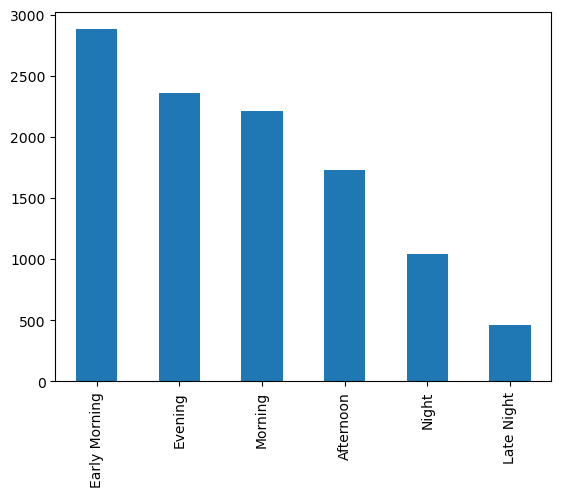

In [26]:
df_copy['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind= 'bar')

In [27]:
def preprocess_dur(x):
    if 'h' not in x:
        x= x+' '+'0h'
    elif 'm' not in x:
        x= x+' '+' 0m'
    
    return x

In [28]:
df_copy['Duration']=df_copy['Duration'].apply(preprocess_dur)

In [29]:
df_copy['Duration_hrs']=df_copy['Duration'].apply(lambda x: int(x.split(' ')[0][0:-1]))
#df_copy['Duration_mins']=df_copy['Duration'].apply(lambda x: int(x.split(' ')[1][0:-1]))

df_copy['Duration_mins']=df_copy['Duration'].apply(lambda x: int(x.split(' ')[0][1:1]))

In [30]:
df_copy['Duration_mins']=df_copy['Duration'].apply(lambda x: x.split(' ')[1][0:-1])

In [31]:
df_copy['Duration_total_min']= df_copy['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

<Axes: xlabel='Duration_total_min', ylabel='Price'>

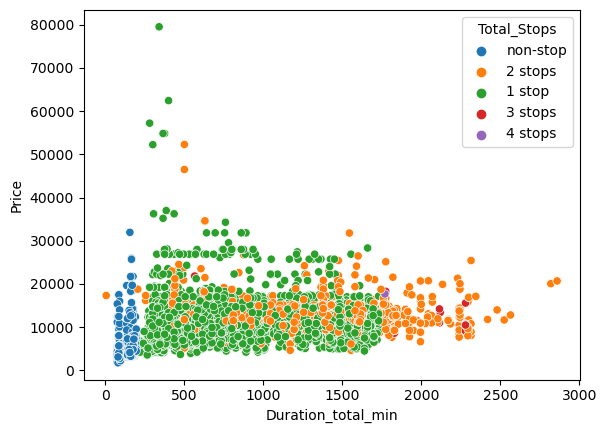

In [32]:
sns.scatterplot(x='Duration_total_min',y='Price',data=df_copy,hue='Total_Stops')

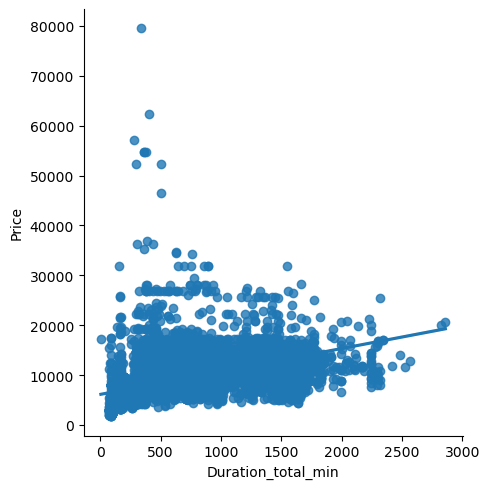

In [33]:
sns.lmplot(x='Duration_total_min',y='Price',data=df_copy)

In [34]:
df_copy

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey Day,Journey Month,Journey Year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hrs,Duration_mins,Duration_total_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25,445
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,2019,9,25,4,25,19,,1140
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25,325
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-04-09,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,9,4,2019,19,55,22,25,2,30,150
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,2019,20,45,23,20,2,35,155
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,3h 0m,non-stop,No info,7229,27,4,2019,8,20,11,20,3,,180
10681,Vistara,2019-03-01,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,1,3,2019,11,30,14,10,2,40,160


In [35]:
df_copy[df_copy['Airline']=='Jet Airways'].groupby('Route').size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

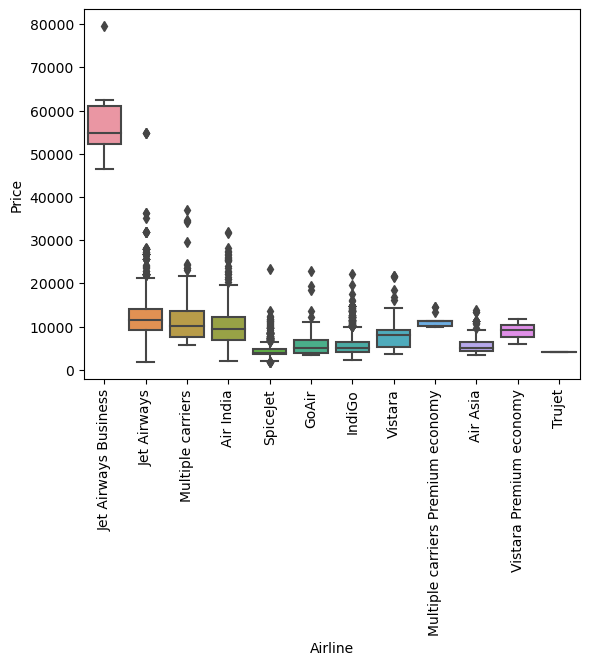

In [36]:
sns.boxplot(y='Price',x='Airline',data=df_copy.sort_values(by='Price',ascending=False))
plt.xticks(rotation = 'vertical')
plt.show()

In [37]:
cat_col= [col for col in df_copy.columns if df_copy[col].dtype == "object"]
num_col= [col for col in df_copy.columns if df_copy[col].dtype != "object"]

In [38]:
cat_col

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info',
 'Duration_mins']

In [39]:
df_copy['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [40]:
df_copy['Source'].apply(lambda x : 1 if x == 'Banglore' else 0)

0        1
1        0
2        0
3        0
4        1
        ..
10678    0
10679    0
10680    1
10681    1
10682    0
Name: Source, Length: 10682, dtype: int64

In [41]:
for sub_category in df_copy['Source'].unique():
    df_copy['Source'+sub_category]=df_copy['Source'].apply(lambda x : 1 if x == sub_category else 0)

In [42]:
df_copy.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey Day,...,Arrival_Time_hour,Arrival_Time_min,Duration_hrs,Duration_mins,Duration_total_min,SourceBanglore,SourceKolkata,SourceDelhi,SourceChennai,SourceMumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,4,25,19,,1140,0,0,1,0,0
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,...,23,30,5,25,325,0,1,0,0,0
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,...,21,35,4,45,285,1,0,0,0,0


In [43]:
airlines = df_copy.groupby(['Airline'])['Price'].mean().sort_values().index

In [44]:
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [45]:
#to make dict 
dict_airlines = {key:index for index,key in enumerate(airlines,0)}

In [46]:
#to make dict 
dict_airlines

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [47]:
df_copy['Airline'] = df_copy['Airline'].map(dict_airlines)

In [48]:
df_copy

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey Day,...,Arrival_Time_hour,Arrival_Time_min,Duration_hrs,Duration_mins,Duration_total_min,SourceBanglore,SourceKolkata,SourceDelhi,SourceChennai,SourceMumbai
0,3,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0
2,10,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,4,25,19,,1140,0,0,1,0,0
3,3,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,...,23,30,5,25,325,0,1,0,0,0
4,3,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,...,21,35,4,45,285,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2,2019-04-09,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,9,...,22,25,2,30,150,0,1,0,0,0
10679,7,2019-04-27,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,...,23,20,2,35,155,0,1,0,0,0
10680,10,2019-04-27,Banglore,Delhi,BLR → DEL,3h 0m,non-stop,No info,7229,27,...,11,20,3,,180,1,0,0,0,0
10681,5,2019-03-01,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,1,...,14,10,2,40,160,1,0,0,0,0


In [49]:
df_copy['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [50]:
df_copy['Destination'].replace('New Delhi','Delhi',inplace=True)

In [51]:
df_copy['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [52]:
dest = df_copy.groupby(['Destination'])['Price'].mean().sort_values().index

In [53]:
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [54]:
dict_dest = {key:index for index,key in enumerate(dest,0)}

In [55]:
dict_dest

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [56]:
df_copy['Destination']=df_copy['Destination'].map(dict_dest)

In [57]:
#ordinal data so use label encoding
df_copy['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [58]:
stop = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [59]:
df_copy['Total_Stops']=df_copy['Total_Stops'].map(stop)

In [60]:
df_copy['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int64

In [61]:
df_copy.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey Day',
       'Journey Month', 'Journey Year', 'Dep_Time_hour', 'Dep_Time_min',
       'Arrival_Time_hour', 'Arrival_Time_min', 'Duration_hrs',
       'Duration_mins', 'Duration_total_min', 'SourceBanglore',
       'SourceKolkata', 'SourceDelhi', 'SourceChennai', 'SourceMumbai'],
      dtype='object')

In [62]:
df_copy['Additional_Info'].value_counts()/len(df_copy)
#hence can be dropped

No info                         0.781127
In-flight meal not included     0.185546
No check-in baggage included    0.029957
1 Long layover                  0.001779
Change airports                 0.000655
Business class                  0.000374
No Info                         0.000281
1 Short layover                 0.000094
Red-eye flight                  0.000094
2 Long layover                  0.000094
Name: Additional_Info, dtype: float64

In [63]:
cols_remove=['Date_of_Journey','Route','Additional_Info','Source', 'Journey Year']
df_copy.drop(cols_remove,inplace=True,axis=1)

In [64]:
df_copy.head()

,Airline,Destination,Duration,Total_Stops,Price,Journey Day,Journey Month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hrs,Duration_mins,Duration_total_min,SourceBanglore,SourceKolkata,SourceDelhi,SourceChennai,SourceMumbai
0,3,2,2h 50m,0,3897,24,3,22,20,1,10,2,50,170,1,0,0,0,0
1,7,3,7h 25m,2,7662,1,5,5,50,13,15,7,25,445,0,1,0,0,0
2,10,4,19h 0m,2,13882,9,6,9,25,4,25,19,,1140,0,0,1,0,0
3,3,3,5h 25m,1,6218,12,5,18,5,23,30,5,25,325,0,1,0,0,0
4,3,2,4h 45m,1,13302,1,3,16,50,21,35,4,45,285,1,0,0,0,0


In [65]:
df_copy.drop('Duration',inplace=True,axis=1)

In [66]:
df_copy.head()

,Airline,Destination,Total_Stops,Price,Journey Day,Journey Month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hrs,Duration_mins,Duration_total_min,SourceBanglore,SourceKolkata,SourceDelhi,SourceChennai,SourceMumbai
0,3,2,0,3897,24,3,22,20,1,10,2,50,170,1,0,0,0,0
1,7,3,2,7662,1,5,5,50,13,15,7,25,445,0,1,0,0,0
2,10,4,2,13882,9,6,9,25,4,25,19,,1140,0,0,1,0,0
3,3,3,1,6218,12,5,18,5,23,30,5,25,325,0,1,0,0,0
4,3,2,1,13302,1,3,16,50,21,35,4,45,285,1,0,0,0,0


In [67]:
def plot(df,col):
    fig,(ax1,ax2,ax3) = plt.subplots(3,1)
    sns.histplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2,orient='h')
    sns.distplot(df[col],ax=ax3,kde=False)

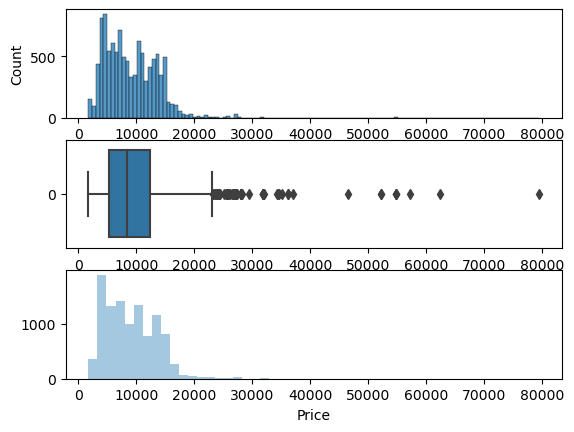

In [68]:
plot(df_copy,'Price')

In [69]:
q3=df_copy['Price'].quantile(0.75)
q1=df_copy['Price'].quantile(0.25)
iqr = q3-q1
max = q3+1.5*iqr
min = q1-1.5*iqr

In [70]:
min

-5367.0

In [71]:
max

23017.0

In [72]:
print([price for price in df_copy['Price'] if price> max or price < min])

[27430, 36983, 26890, 26890, 25139, 27210, 52229, 26743, 26890, 25735, 27992, 26890, 26890, 23583, 26890, 23533, 24115, 25735, 54826, 31783, 27992, 26890, 26890, 25430, 36235, 27210, 26890, 25735, 54826, 26890, 35185, 79512, 28097, 27992, 26890, 25735, 26092, 31825, 25913, 25735, 27992, 31825, 23267, 62427, 54826, 31825, 25430, 26890, 36235, 23843, 26890, 25735, 28322, 25735, 25735, 31825, 26890, 27992, 34273, 46490, 29528, 26890, 26890, 26890, 34503, 26890, 27992, 26890, 26890, 23170, 24528, 26890, 27992, 25735, 34608, 25703, 26890, 23528, 31825, 27282, 25735, 27992, 52285, 24017, 31945, 26890, 24318, 23677, 27992, 24210, 57209, 26890, 31825, 26480]


In [73]:
len([price for price in df_copy['Price'] if price> max or price < min])

94

In [74]:
#replacing outliers with median
df_copy['Price']=np.where(df_copy['Price']>=35000,df_copy['Price'].median(),df_copy['Price'])

In [75]:
df_copy['Price'].max()

34608.0

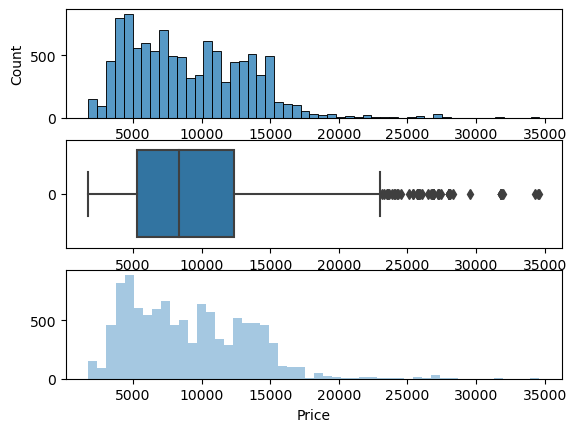

In [76]:
plot(df_copy,'Price')

In [77]:
y = df_copy['Price']

In [78]:
X=df_copy.drop(['Price','Duration_mins'],axis=1)

In [79]:
X.dtypes

Airline               int64
Destination           int64
Total_Stops           int64
Journey Day           int64
Journey Month         int64
Dep_Time_hour         int64
Dep_Time_min          int64
Arrival_Time_hour     int64
Arrival_Time_min      int64
Duration_hrs          int64
Duration_total_min    int64
SourceBanglore        int64
SourceKolkata         int64
SourceDelhi           int64
SourceChennai         int64
SourceMumbai          int64
dtype: object

In [80]:
from sklearn.feature_selection import mutual_info_regression
imp = mutual_info_regression(X,y)

In [81]:
imp

array([0.97253708, 1.00159667, 0.79900603, 0.23263786, 0.63166524,
       0.33586636, 0.24959677, 0.40384969, 0.34364029, 0.47973751,
       0.49236841, 0.38967678, 0.46057122, 0.52822683, 0.1378322 ,
       0.19558395])

In [82]:
imp_df = pd.DataFrame(imp,index=X.columns)

In [83]:
imp_df.sort_values(by=0,ascending= False)

,0
Destination,1.001597
Airline,0.972537
Total_Stops,0.799006
Journey Month,0.631665
SourceDelhi,0.528227
Duration_total_min,0.492368
Duration_hrs,0.479738
SourceKolkata,0.460571
Arrival_Time_hour,0.403850
SourceBanglore,0.389677


In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [85]:
from sklearn.ensemble import RandomForestRegressor
ml_model = RandomForestRegressor()

In [86]:
ml_model.fit(X_train,y_train)

RandomForestRegressor()

In [87]:
y_pred = ml_model.predict(X_test)

In [88]:
y_pred

array([16868.63,  5423.14,  8815.54, ...,  3556.43,  6424.24,  6825.53])

In [89]:
from sklearn import metrics

In [90]:
metrics.r2_score(y_test,y_pred)

0.8177917995904603

In [91]:
def mape(y_true,y_pred):
    y_true,y_pred = np.array(y_true),np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [92]:
mape(y_test,y_pred)

13.04688014856517

In [93]:
def predict_model_with_vals(ml_model):
    model = ml_model.fit(X_train,y_train)
    print('Training Score: {}'.format(ml_model.score(X_train,y_train)))
    y_predictions = model.predict(X_test)
    print('Predictions are: {}'.format(y_predictions))
    r2_score = metrics.r2_score(y_test,y_predictions)
    print('r2 score: {}'.format(r2_score))
    print('MAE: {}'.format(metrics.mean_absolute_error(y_test,y_predictions))) 
    print('MSEE: {}'.format(metrics.mean_squared_error(y_test,y_predictions))) 
    print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test,y_predictions))))
    print('MAPE: {}'.format(mape(y_test,y_predictions)))  
    sns.distplot(y_test-y_predictions)
    

Training Score: 0.9511867635298095
Predictions are: [16717.62  5480.6   8777.61 ...  3572.89  6319.1   6924.2 ]
r2 score: 0.8197027863671376
MAE: 1157.8499130032994
MSEE: 3509953.9757971
RMSE: 1873.4871165281868
MAPE: 13.03162183554279


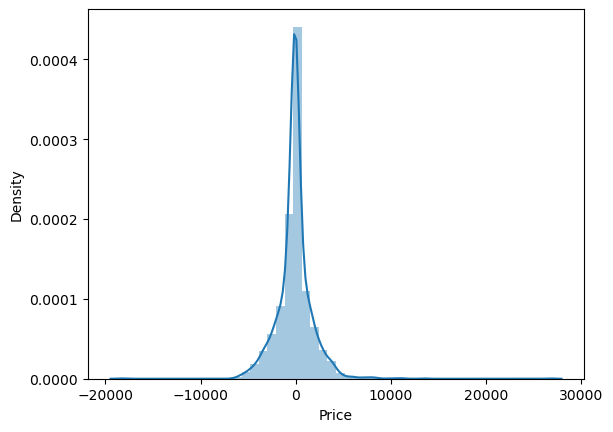

In [94]:
predict_model_with_vals(RandomForestRegressor())

In [95]:
#ADD linear regression

Training Score: 0.966591628243878
Predictions are: [16840.  4959.  9397. ...  3419.  5797.  6818.]
r2 score: 0.7284774560456105
MAE: 1342.7406090103582
MSEE: 5285892.185843213
RMSE: 2299.1068234954228
MAPE: 15.075846777594979


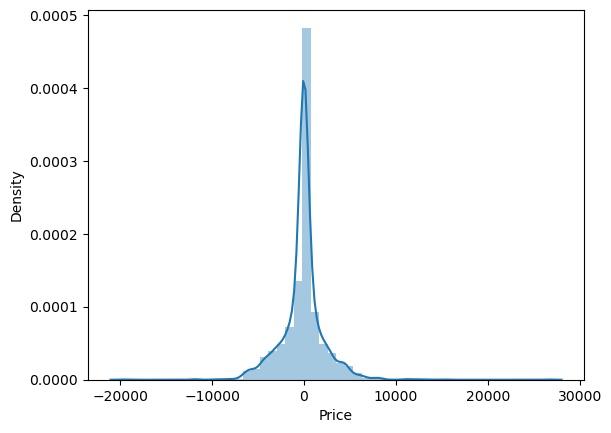

In [96]:
from sklearn.tree import DecisionTreeRegressor
predict_model_with_vals(DecisionTreeRegressor())

Training Score: 0.7433541568298478
Predictions are: [16315.   5158.2  8536.  ...  4125.6 11656.4  6958.4]
r2 score: 0.5627176314808455
MAE: 1816.4793710220888
MSEE: 8512838.091081992
RMSE: 2917.6768311589944
MAPE: 19.969497277015442


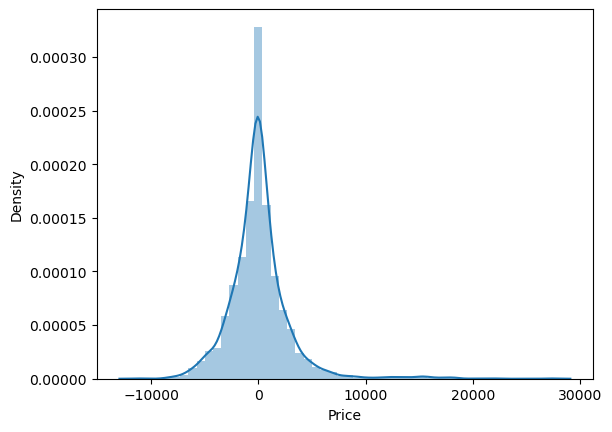

In [97]:
from sklearn.neighbors import KNeighborsRegressor
predict_model_with_vals(KNeighborsRegressor())

Training Score: 0.5961847753339997
Predictions are: [12761.31153832  8087.77032421  8970.61142715 ...  3326.43032832
  8967.96808397  7618.98575986]
r2 score: 0.5710936204764754
MAE: 2013.89101915105
MSEE: 8349777.690513021
RMSE: 2889.598188418767
MAPE: 24.895360938470944


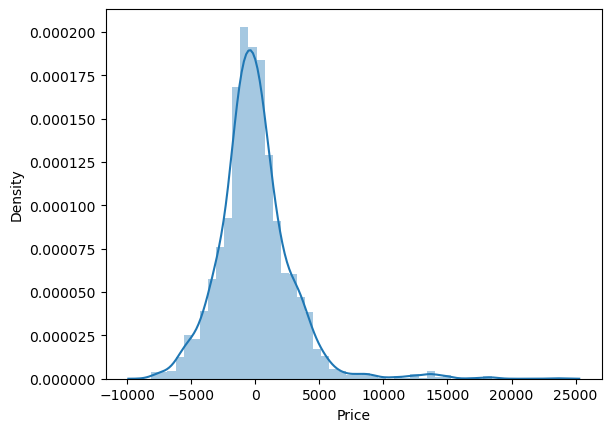

In [98]:
from sklearn.linear_model import LinearRegression
predict_model_with_vals(LinearRegression())